In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
##reading the data
data=pd.read_csv('heart_1710826235378.csv')
data

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,typical,110,264,0,0,132,0,1.2,2,0,reversable,Yes
299,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2,reversable,Yes
300,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1,reversable,Yes
301,57,0,nontypical,130,236,0,2,174,0,0.0,2,1,normal,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       303 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(1), int64(10), object(3)
memory usage: 33.3+ KB


In [4]:
data.AHD.value_counts()

AHD
No     164
Yes    139
Name: count, dtype: int64

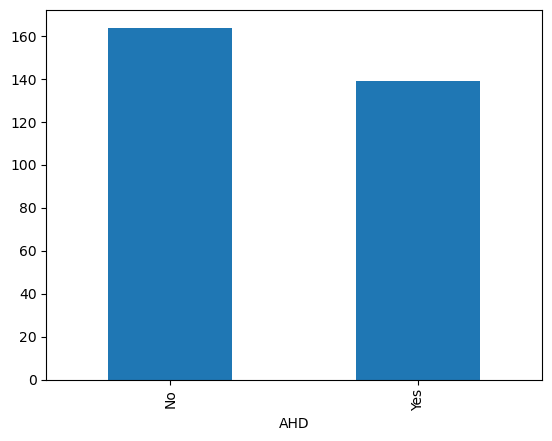

In [5]:
data['AHD'].value_counts().plot(kind='bar')
plt.show()

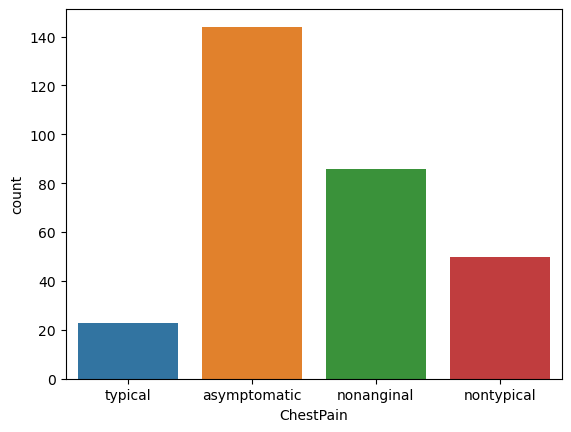

In [6]:
##chestpain-vs-heart-disease
sns.countplot(x=data['ChestPain'])
plt.show()

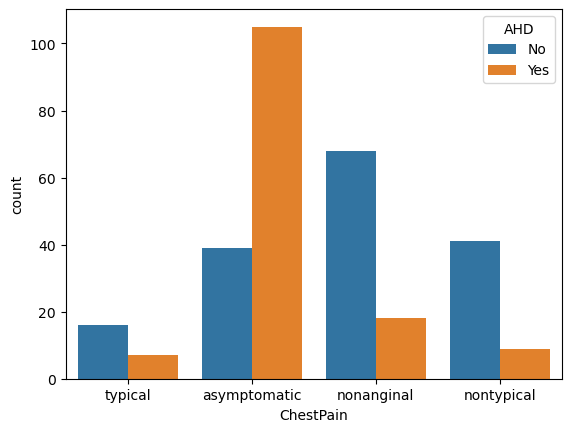

In [7]:
sns.countplot(x=data['ChestPain'],hue='AHD',data=data)
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


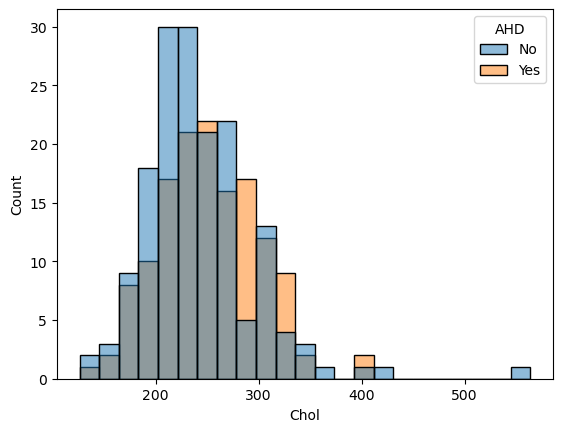

In [8]:
sns.histplot(x=data.Chol,hue='AHD',data=data)
plt.show()

In [9]:
data['AHD']=data['AHD'].replace({'Yes':1,'No':0})

<Axes: >

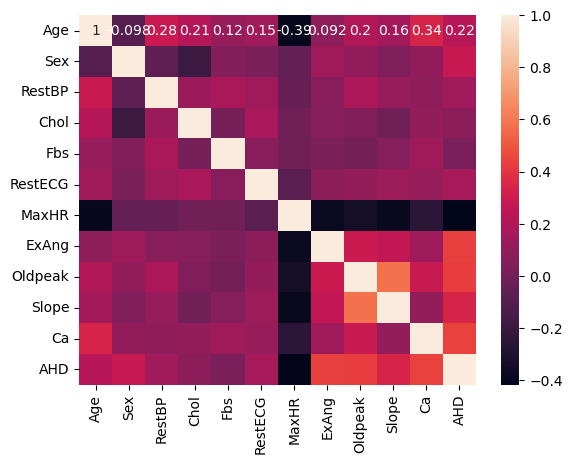

In [10]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       303 non-null    object 
 13  AHD        303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [13]:
from sklearn.preprocessing import LabelEncoder
data['ChestPain']=LabelEncoder().fit_transform(data['ChestPain'])

In [14]:
from sklearn.preprocessing import LabelEncoder
data['Thal']=LabelEncoder().fit_transform(data['Thal'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    int64  
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         303 non-null    int64  
 12  Thal       303 non-null    int32  
 13  AHD        303 non-null    int64  
dtypes: float64(1), int32(1), int64(12)
memory usage: 32.1 KB


In [21]:
x=data.drop('AHD',axis=1)
y=data['AHD']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [28]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)

SVC()

In [29]:
y_pred=classifier.predict(x_test)

In [30]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_pred,y_test))

0.6593406593406593


In [34]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.83      0.63      0.72        63
           1       0.47      0.71      0.56        28

    accuracy                           0.66        91
   macro avg       0.65      0.67      0.64        91
weighted avg       0.72      0.66      0.67        91

